In [1]:
import pandas as pd
import re
from pymongo import MongoClient
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(".\SMSSpamCollection",sep="\t", header= None) 

In [3]:
df.columns = ['label','message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
def countspam(code):
    n=0
    countsp = 0
    countha = 0
    for line in df['message']: # Parcours des lignes
        x = re.findall(code, line)
        if x:
            #print(n, 'findall:', x)#commenter les prints pour de la visibilité
            #print(df['label'][n])
            #print(df['message'][n])
        
            if df['label'][n]== 'spam':
                countsp +=1
            else:
                countha +=1     
        n+=1
    print('Nombre de Spam :', countsp)
    print('Nombre de Ham :', countha)

In [5]:
countspam("[0-9]{10}")

Nombre de Spam : 405
Nombre de Ham : 1


In [6]:
countspam("£|\$")

Nombre de Spam : 257
Nombre de Ham : 19


In [7]:
countspam("[\w.+%-]+@[\w.-]+\.[a-zA-Z]{2,4}")

Nombre de Spam : 6
Nombre de Ham : 1


In [8]:
countspam("(?i)now")

Nombre de Spam : 209
Nombre de Ham : 525


In [9]:
client = MongoClient('mongodb://localhost/')

In [10]:
db = client['testEG']
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'testEG')


In [11]:
countspam("(?i)reply")

Nombre de Spam : 98
Nombre de Ham : 44


In [12]:
countspam("txt")

Nombre de Spam : 106
Nombre de Ham : 10


In [13]:
countspam("(?i)(prize)")

Nombre de Spam : 89
Nombre de Ham : 0


(array([ 67.,  99., 748., 708., 559., 440., 307., 305., 233., 213., 151.,
        150., 161., 157., 190., 216., 358., 300.,  42.,  31.,  14.,  12.,
         12.,   3.,   8.,  10.,   8.,   4.,   3.,   2.,  10.,   4.,   7.,
          1.,   2.,   7.,   4.,   1.,   1.,   1.,   2.,   3.,   1.,   0.,
          1.,   1.,   0.,   1.,   5.,   0.,   2.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  2.  ,  11.08,  20.16,  29.24,  38.32,  47.4 ,  56.48,  65.56,
         74.64,  83.72,  92.8 , 101.88, 110.96, 120.04, 129.12, 138.2 ,
        147.28, 156.36, 165.44, 174.52, 183.6 , 192.68, 201.76, 210.84,
        219.92, 229.  , 238.08, 247.16, 256.24, 265.32, 274.4 , 283.48,
        292.56, 301.64, 310.72

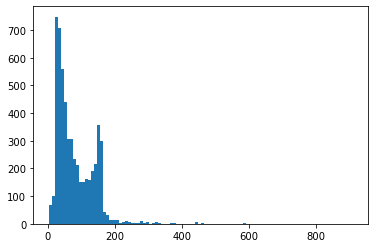

In [14]:
plt.hist(df['message'].str.len(), bins=100)

In [15]:
dfspam = df[df['label']=='spam']
dfham = df[df['label']=='ham']

(array([ 67.,  97., 747., 703., 552., 432., 302., 287., 224., 204., 132.,
        126., 133., 126., 111., 109., 164., 118.,  31.,  25.,  14.,  11.,
         12.,   3.,   7.,  10.,   8.,   4.,   3.,   2.,  10.,   4.,   7.,
          1.,   2.,   7.,   4.,   1.,   1.,   1.,   2.,   3.,   1.,   0.,
          1.,   1.,   0.,   1.,   5.,   0.,   2.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  2.  ,  11.08,  20.16,  29.24,  38.32,  47.4 ,  56.48,  65.56,
         74.64,  83.72,  92.8 , 101.88, 110.96, 120.04, 129.12, 138.2 ,
        147.28, 156.36, 165.44, 174.52, 183.6 , 192.68, 201.76, 210.84,
        219.92, 229.  , 238.08, 247.16, 256.24, 265.32, 274.4 , 283.48,
        292.56, 301.64, 310.72

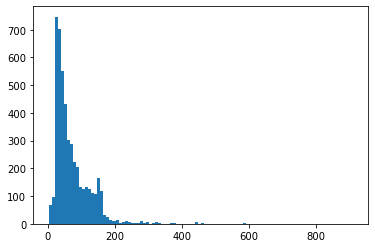

In [16]:
plt.hist(dfham['message'].str.len(), bins=100)

(array([ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  3.,  0.,  1.,  1.,
         2.,  1.,  1.,  4.,  4.,  2.,  0.,  0.,  1.,  0.,  1.,  3.,  1.,
         4.,  4.,  6.,  3.,  2.,  0.,  6.,  2.,  3.,  0.,  5.,  0.,  1.,
         5.,  4.,  9.,  2.,  4.,  9.,  6.,  6.,  3., 10.,  1., 11., 10.,
         5., 10.,  3., 10., 13., 14., 27., 18., 23., 25., 27., 32., 32.,
        18., 49., 58., 68., 76., 65.,  6.,  8.,  1.,  2.,  2.,  2.,  2.,
         1.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 13. ,  15.1,  17.2,  19.3,  21.4,  23.5,  25.6,  27.7,  29.8,
         31.9,  34. ,  36.1,  38.2,  40.3,  42.4,  44.5,  46.6,  48.7,
         50.8,  52.9,  55. ,  57.1,  59.2,  61.3,  63.4,  65.5,  67.6,
         69.7,  71.8,  73.9,  76. ,  78.1,  80.2,  82.3,  84.4,  86.5,
         88.6,  90.7,  92.8,  94.9,  97. ,  99.1, 101.2, 103.3, 105.4,
        107.5, 109.6, 111.7, 113.8, 115.9, 118. , 120.1, 122.2, 124.3,
        

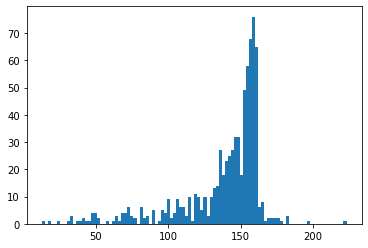

In [17]:
plt.hist(dfspam['message'].str.len(), bins=100)

In [18]:
df.insert(2, "length", "0", allow_duplicates=False)
for x in range(df.message.size):
       df.length.array[x] = len(df.message.array[x])


In [19]:
df.head

<bound method NDFrame.head of      label                                            message length
0      ham  Go until jurong point, crazy.. Available only ...    111
1      ham                      Ok lar... Joking wif u oni...     29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...    155
3      ham  U dun say so early hor... U c already then say...     49
4      ham  Nah I don't think he goes to usf, he lives aro...     61
...    ...                                                ...    ...
5567  spam  This is the 2nd time we have tried 2 contact u...    160
5568   ham               Will ü b going to esplanade fr home?     36
5569   ham  Pity, * was in mood for that. So...any other s...     57
5570   ham  The guy did some bitching but I acted like i'd...    125
5571   ham                         Rofl. Its true to its name     26

[5572 rows x 3 columns]>

In [20]:
dflon = df[df['length']> 800 ]

In [21]:
def countcolumn(code, namecol, df =df):
    n=0
    df.insert(1, namecol, 0, allow_duplicates=False)
    for line in df['message']: # Parcours des lignes
        x = re.findall(code, line)
        if x:
            df[namecol].array[n] = len(x)
        n+=1    


class ColumnCountCreator(BaseEstimator,TransformerMixin):
    def __init__(self, code, namecol):
        self.code = code
        self.namecol =namecol
    
    def fit(self, X, y =None):
        return self
    
    def transform(self, X, y =None):
        df = X.copy()
        n=0
        df.insert(1, self.namecol, 0, allow_duplicates=False)
        for line in df['message']: # Parcours des lignes
            x = re.findall(self.code, line)
            if x:
                df[self.namecol].array[n] = len(x)
            n+=1   
        return df

In [22]:
column_mess =['message']
transfo_col = Pipeline(steps=[
    ('freeCol', ColumnCountCreator("(?i)(FREE)", "free")),
    ('phoneCol', ColumnCountCreator("[0-9]{10}", "phone")),
    ('prizeCol', ColumnCountCreator("(?i)(prize)", "prize")),
    ('giveCol', ColumnCountCreator("(?i)(give)", "give")),
    ('devCol', ColumnCountCreator("£|\$", "devise")),
    ('txtCol', ColumnCountCreator("txt", "text")),
    ('replyCol', ColumnCountCreator("(?i)(reply)", "reply"))
])
pipedf =transfo_col.fit_transform(df)


In [23]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

def classifiertest(classifier, X, y, testset_size=0.25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testset_size, random_state=37, stratify=y)
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    # Compute the accuracy (in %)
    accuracy = accuracy_score(y_test, prediction)*100
    # Let's see the global performance
    print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')
    plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.summer, # other color palettes : https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
                                 normalize=None)




In [25]:
from sklearn.preprocessing import LabelEncoder
column_cat = ['label']

label_encod = LabelEncoder()
dfe =label_encod.fit_transform(pipedf['label'])
y = dfe
Xdf =pipedf[['length','free','phone','prize','give','devise','text','reply']]

standardis = Pipeline(steps=[('scaler', StandardScaler())])
X=standardis.fit_transform(Xdf)

Accuracy of our model is equal 96.2 %.


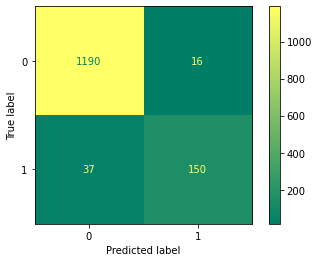

In [26]:
from sklearn.neighbors import KNeighborsClassifier
# Initialisation with the choice of k = 3
KNN_classifier = KNeighborsClassifier(n_neighbors=5)
classifiertest(KNN_classifier, X, y)

Accuracy of our model is equal 96.2 %.


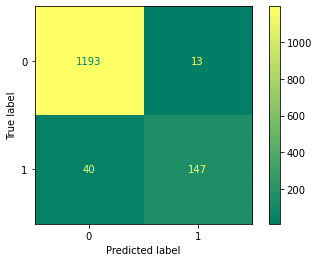

In [27]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
classifiertest(clf, X, y)

Accuracy of our model is equal 95.84 %.


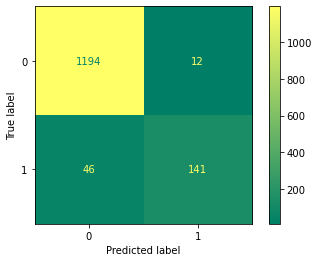

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)
classifiertest(lr, X, y)

In [29]:
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import nltk
import string
stemmer = SnowballStemmer("english")

def cleanText(message):
    
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)



Accuracy of our model is equal 96.34 %.


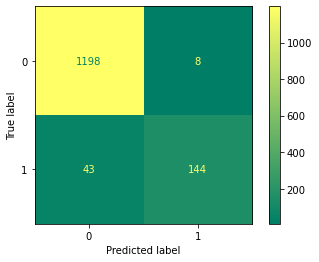

In [30]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
classifiertest(nb, Xdf, y)

In [31]:
#Xnlp = df['message'].apply(cleanText)

In [32]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv=CountVectorizer()
#Xnlp=cv.fit_transform(Xnlp)

In [33]:

from sklearn.model_selection import GridSearchCV

parameters = {'max_features':('auto', 'sqrt','log2'), 'max_depth':range(5, 25, 1)}
clt = tree.DecisionTreeClassifier()
clf = GridSearchCV(clt, parameters)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37, stratify=y)
clf.fit(X_train, y_train)



GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 25),
                         'max_features': ('auto', 'sqrt', 'log2')})

In [34]:
clf.best_score_

0.9674661412329575

In [35]:
clf.best_params_

{'max_depth': 22, 'max_features': 'sqrt'}

In [36]:
print("Write the SMS to test")
mss = input()


Write the SMS to test
ok


In [37]:
mssdt = {'message': [mss]}
mssdf = pd.DataFrame(mssdt)  
mssdf.insert(1, "length", len(mss), allow_duplicates=False)
mssdf =transfo_col.fit_transform(mssdf)
Xpred =mssdf[['length','free','phone','prize','give','devise','text','reply']]
#mssdf.drop('message',axis=1)

In [38]:
res = clf.predict(Xpred)
label_encod.inverse_transform(res)

array(['ham'], dtype=object)